<a href="https://colab.research.google.com/github/Adityavdwiv/CSCI381/blob/main/A_Dwivedi_Quiz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

This notebook tackles Quiz 3 on cleaning “messy” data. The dataset includes over 12,700 wine records with chemical composition and subjective metrics.

**Objectives**:
- Load and explore the dataset.
- Perform Exploratory Data Analysis (EDA).
- Identify data quality issues.
- Prepare the dataset for modeling by addressing those issues.
- Re-assess the cleaned data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from GitHub
url = "https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv"
df = pd.read_csv(url)

# Preview
df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


## Exploratory Data Analysis (EDA)

This section explores the structure, statistics, and visual distribution of each variable.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

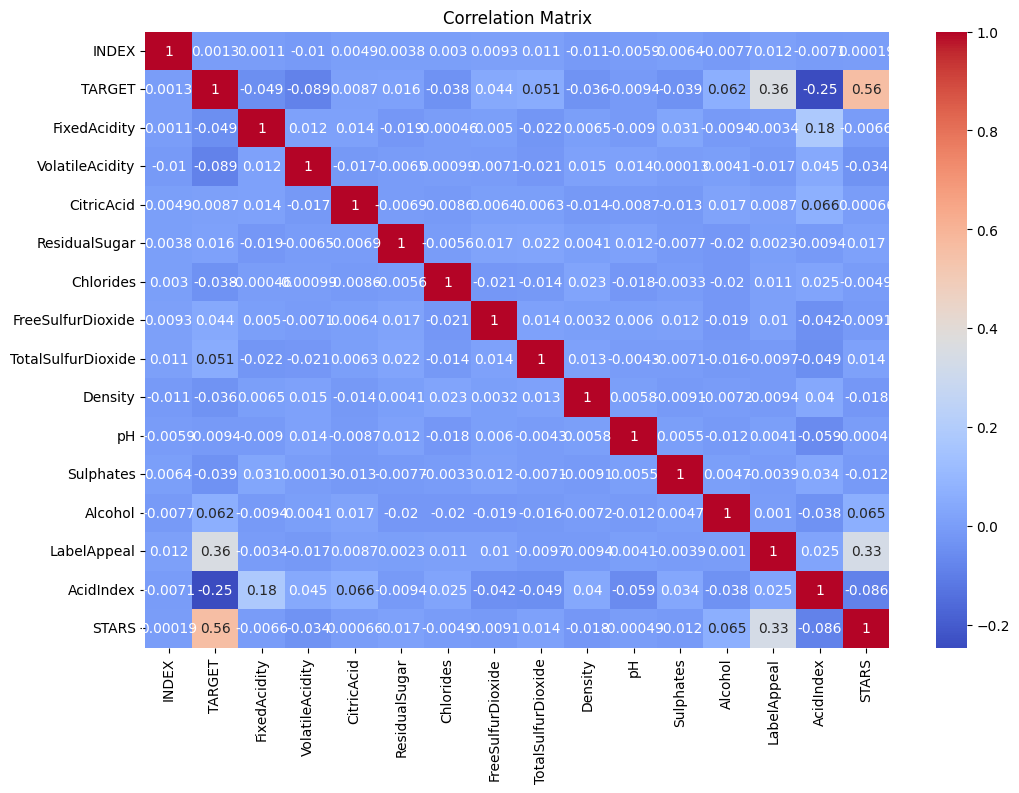

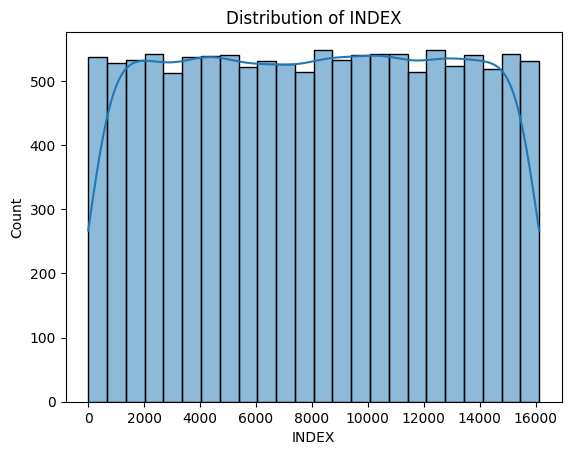

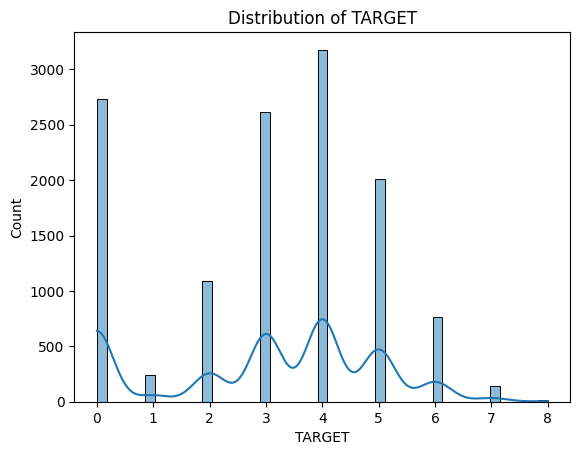

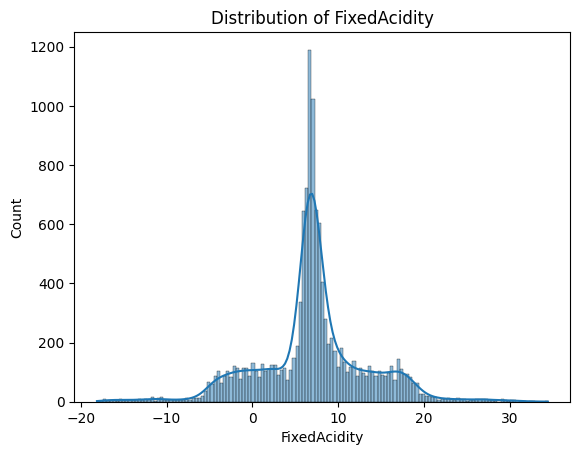

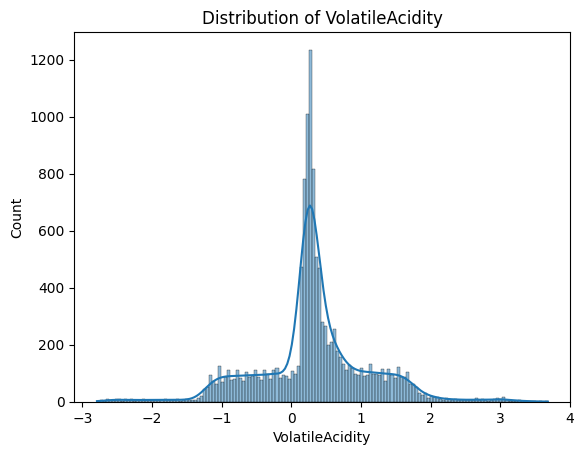

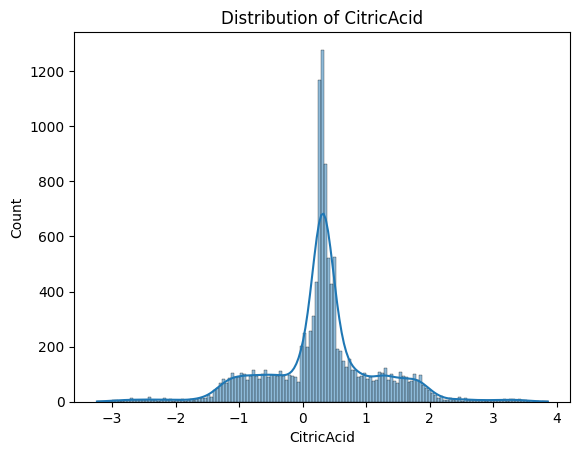

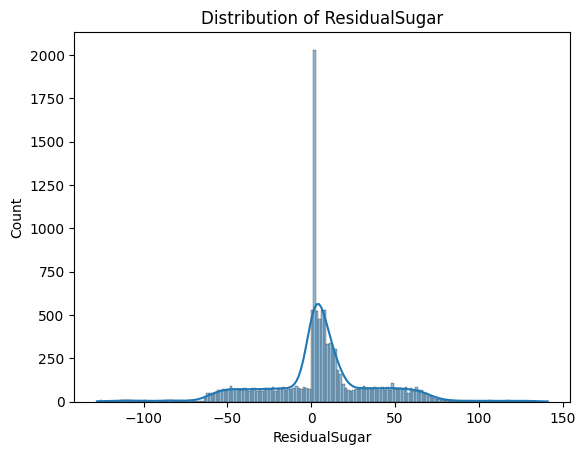

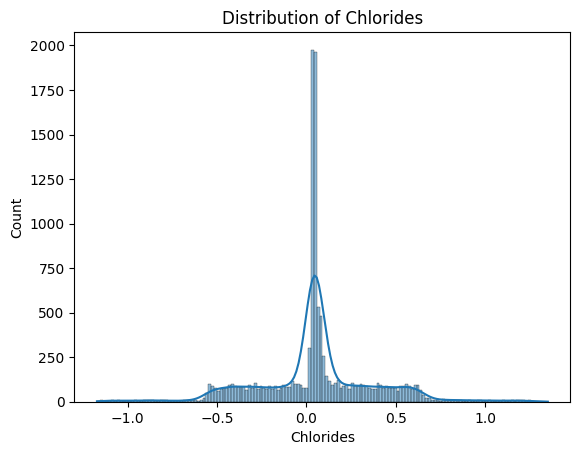

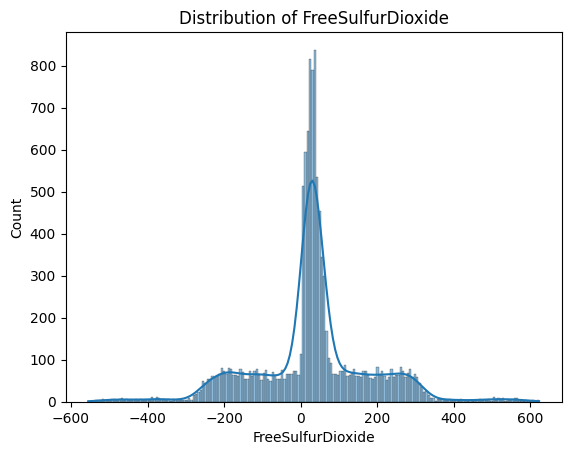

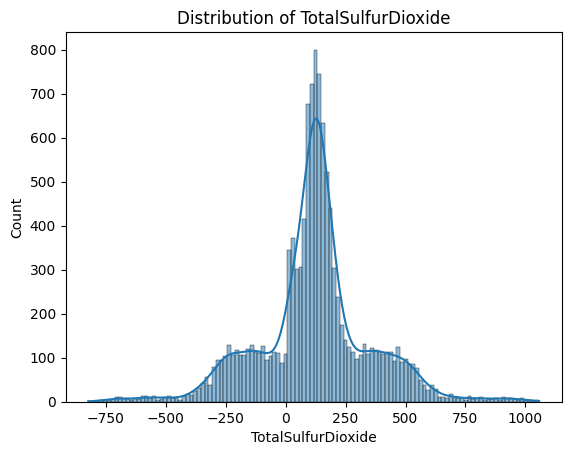

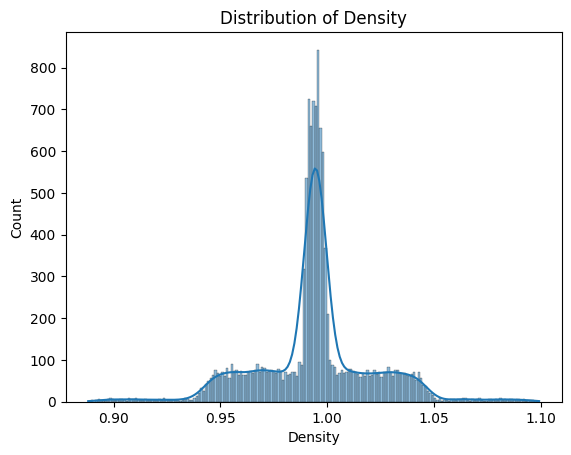

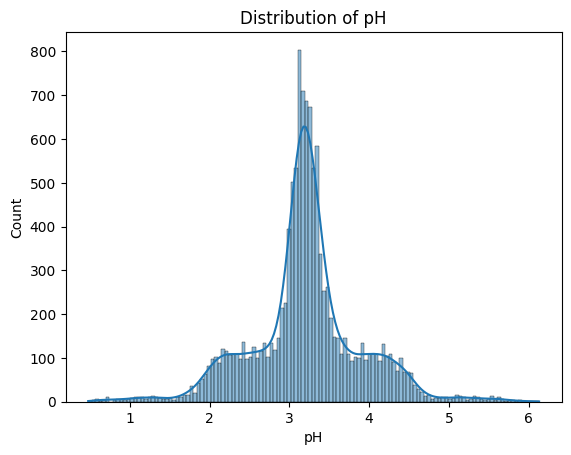

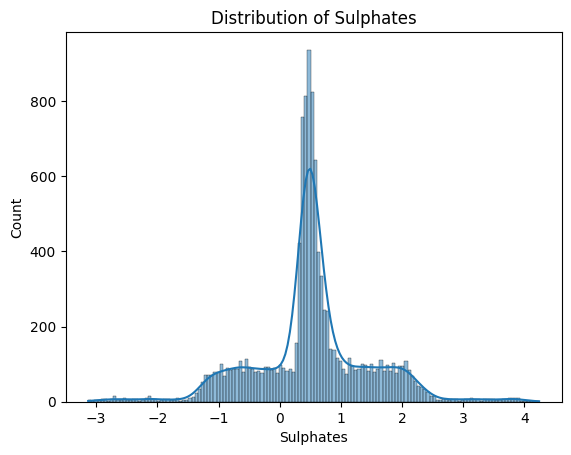

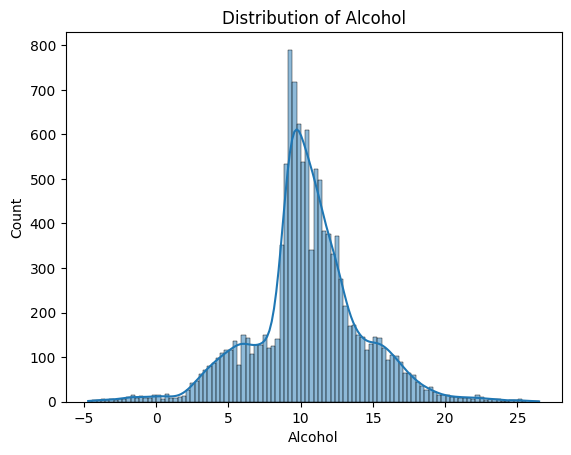

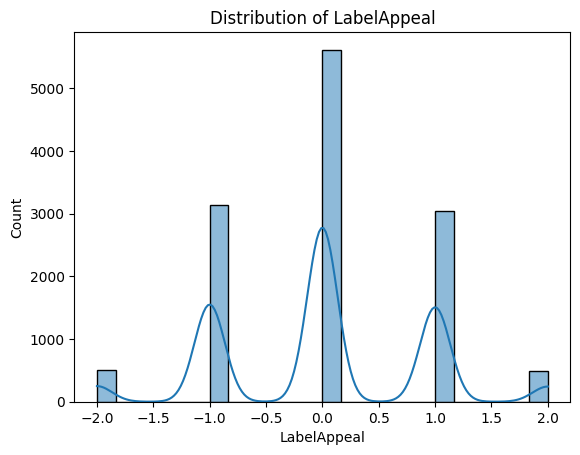

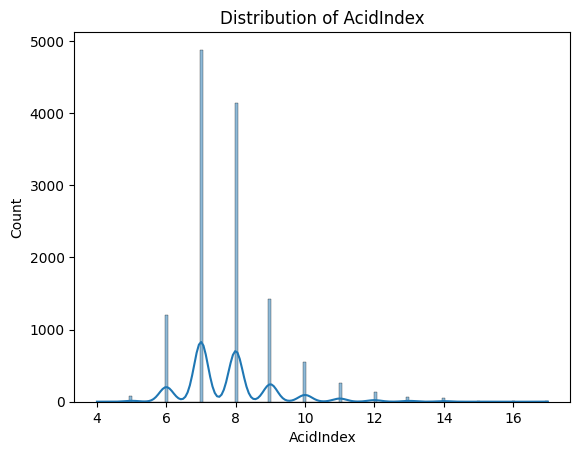

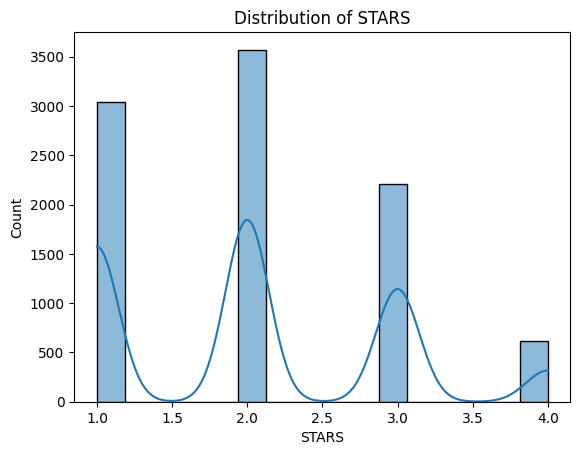

In [2]:
# Summary statistics
df.describe()

# Check for missing values
df.isnull().sum()

# Data types
df.info()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Distribution plots for key numerical variables
numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## Data Preparation

Based on the EDA, we will:
- Handle missing values (e.g., imputation or removal).
- Identify and fix outliers.
- Encode or transform variables if needed.

In [6]:
import numpy as np

# 1. Drop rows where TARGET is missing
df = df.dropna(subset=['TARGET'])

# 2. Fill missing numeric values with the column median
numerical_cols = df.select_dtypes(include='number').columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# 3. Safely apply log1p to skewed features
skewed = ['ResidualSugar', 'TotalSulfurDioxide']

for col in skewed:
    # Replace negative or NaN values with a small positive value (e.g., 0.01)
    df[col] = df[col].apply(lambda x: x if pd.notnull(x) and x >= 0 else 0.01)

    # Apply log1p transformation
    df[col] = np.log1p(df[col])


## Prepped Data Review

We now re-run EDA on transformed columns to evaluate improvements.

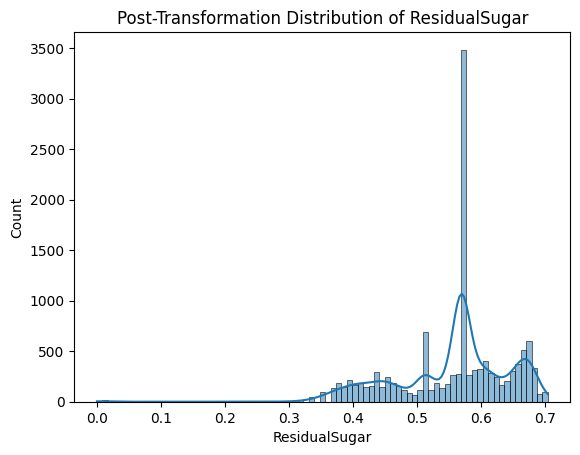

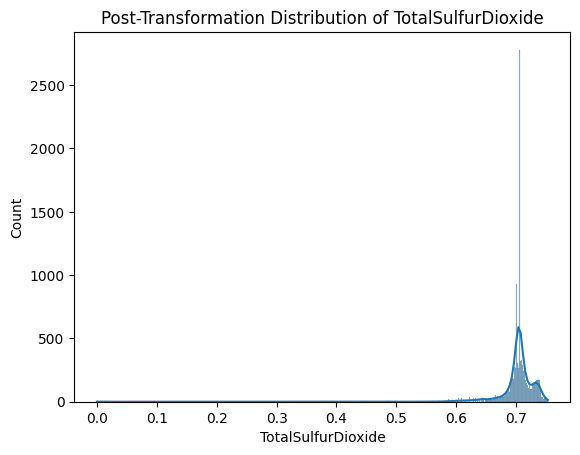

In [7]:
# Check distributions again
for col in skewed:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Post-Transformation Distribution of {col}')
    plt.show()

## Conclusions

- Addressed missing values via imputation and row removal.
- Handled skewed data via log transformation.
- Cleaned dataset is now more suitable for ML algorithms with improved distribution symmetry and completeness.